In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feliperosa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feliperosa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
## Step 1: Load the Data into a Pandas DataFrame
datasets = [
    "Youtube01-Psy.csv",
    "Youtube02-KatyPerry.csv",
    "Youtube03-LMFAO.csv",
    "Youtube04-Eminem.csv",
    "Youtube05-Shakira.csv",
]

# Load all datasets into a single DataFrame
data = pd.concat([pd.read_csv(file)[['CONTENT', 'CLASS']] for file in datasets], ignore_index=True)
data.columns = ['comment', 'label']  # Rename columns for consistency

# Display data preview
print("Preview of the combined dataset:")
print(data.head())

Preview of the combined dataset:
                                             comment  label
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment         1956 non-null   object
 1   label           1956 non-null   int64 
 2   processed_text  1956 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.0+ KB
None
--------------------------------------------------
Distribution of Spam vs Non-Spam:
label
1    1005
0     951
Name: count, dtype: int64
--------------------------------------------------


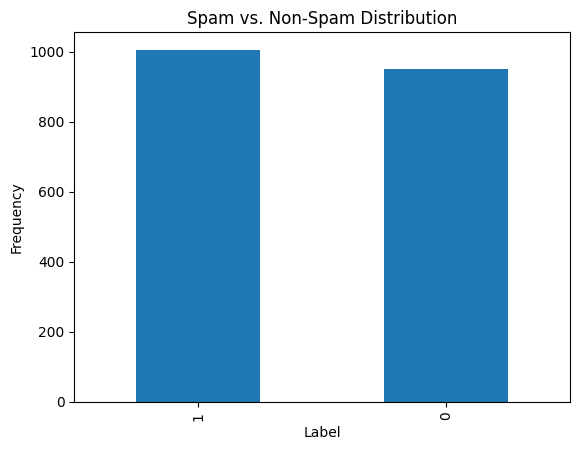

In [20]:
## Step 2: Basic Data Exploration
# Check for null values
print("Dataset Info:")
print(data.info())

# Distribution of labels
print("-"*50)
print("Distribution of Spam vs Non-Spam:")
print(data['label'].value_counts())


# Plot label distribution
print("-"*50)
data['label'].value_counts().plot(kind='bar')
plt.title('Spam vs. Non-Spam Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

## Overview of data exploration
- **Number of Entries**: 1,956 rows
- **Columns**:
  1. **`comment` (object)**: Original comments from the YouTube datasets.
  2. **`label` (int64)**: Binary classification labels (`1` for spam, `0` for non-spam).
  3. **`processed_text` (object)**: Preprocessed comments ready for vectorization.
- **Memory Usage**: Approximately 46 KB.

- No missing values in any column.
- All columns have 1,956 non-null entries.

The dataset contains a total of 1,956 labeled entries split into two categories:
- **1 (Spam)**: 1,005 comments
- **0 (Non-Spam)**: 951 comments

## Analysis
- The dataset is relatively balanced between spam and non-spam comments, with a slight majority of spam comments.
- This balance should ensure fair training and evaluation without significant bias toward either category.


In [ ]:
## Step 3: Prepare Data for Model Building
# Define preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
data['processed_text'] = data['comment'].apply(preprocess_text)

# Display processed data preview
print("Processed Text Preview:")
data[['comment', 'processed_text']].head()

Processed Text Preview:


,comment,processed_text
0,"Huh, anyway check out this you[tube] channel: ...",huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,shaking sexy ass channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,watchvvtarggvgtwq check ﻿


In [21]:
## Step 4: Feature Extraction and Highlights

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the processed text into a feature matrix
X = vectorizer.fit_transform(data['processed_text'])
y = data['label']

# Display feature matrix shape and highlights
print("\nFeature Matrix Shape:")
print(X.shape)

print("\nNumber of Features:")
print(len(vectorizer.get_feature_names_out()))

print("\nSample Features:")
print(vectorizer.get_feature_names_out()[:10])  # Display first 10 features



Feature Matrix Shape:
(1956, 4180)

Number of Features:
4180

Sample Features:
['00' '002' '0058' '025' '04' '0687119038' '10' '100' '1000' '1000000']


## Output Summary
1. **Feature Matrix Shape**:
   - `(1956, 4180)`:
     - **1956**: Number of rows (one for each comment in the dataset).
     - **4180**: Number of unique tokens (features) identified by `CountVectorizer` across all comments.

2. **Number of Features**:
   - A total of **4,180 unique tokens** were extracted from the preprocessed text. This represents the vocabulary size of the `CountVectorizer`.

3. **Sample Features**:
   - Examples of the first 10 tokens in the vocabulary:
     - `'00'`: Likely a numerical token.
     - `'002'`, `'0058'`: Numeric-like tokens, possibly part of video timestamps or product codes.
     - `'10'`, `'100'`, `'1000'`: Common numeric values in comments (e.g., likes, views, or votes).
     - `'1000000'`: Indicative of numbers often used in contexts like "1 million views."

---

## Analysis of the Results
1. **Token Relevance**:
   - The `CountVectorizer` includes numbers and special tokens by default, treating them as valid features.